# <center>Обобщенные линейные модели в Python</center>

## 1. Statsmodels

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error

Реализацию пуассоновской, гамма и других регрессий можно найти в пакете Statsmodels.

In [2]:
import statsmodels.api as sm

Рассмотрим набор данных Crab satellites. Здесь `Satellites` является целевой переменной, которая показывает количество спутников подковообразных крабов по их характеристикам.

In [3]:
crab = pd.read_csv('data/crab.csv')

Учтем константу в линейной модели:

In [4]:
crab = sm.add_constant(crab)
crab.head()

,const,Color,Spine,Width,Satellite,Weight
0,1.0,3,3,28.3,8,3050
1,1.0,4,3,22.5,0,1550
2,1.0,2,1,26.0,9,2300
3,1.0,4,3,24.8,0,2100
4,1.0,4,3,26.0,4,2600


Чтобы построить пуассоновскую регрессию в функцию `GLM` первым аргументом необходимо передать целевую переменную, вторым аргументов &ndash; матрицу "объекты-признаки", а в опцию `family` &ndash; распределение.

In [5]:
poisson_regression = sm.GLM(crab['Satellite'], 
                            crab.drop('Satellite', axis=1), 
                            family=sm.families.Poisson())

Таким образом, линейная регрессия задается в виде:

In [6]:
linear_regression = sm.GLM(crab['Satellite'], 
                           crab.drop('Satellite', axis=1), 
                           family=sm.families.Gaussian())

Обучение модели производится с помощью метода `fit`.

In [7]:
poi_model_results = poisson_regression.fit()

In [8]:
lin_model_results = linear_regression.fit()

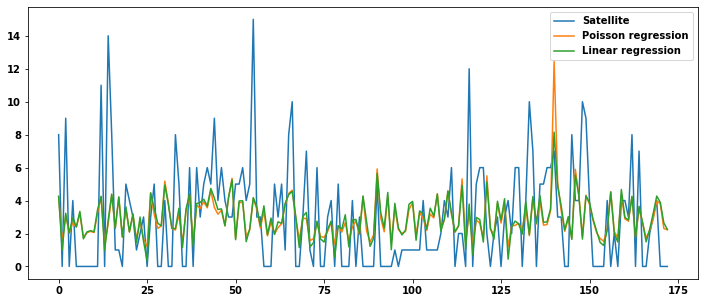

In [9]:
crab['Satellite'].plot(figsize=(12,5), label='Satellite')
poi_model_results.fittedvalues.plot(figsize=(12,5), label='Poisson regression')
lin_model_results.fittedvalues.plot(figsize=(12,5), label='Linear regression')
plt.legend()
plt.show()

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
<ul>Обучите пуассоновскую регрессию из statsmodels на данных о количестве велосипедистов. Сравните качество аппроксимации с качеством, полученным ранее.</ul>
<p></p>
</div>

In [18]:
data = pd.read_csv('data/nyc_bicyclist_counts.csv', index_col=['Date'], parse_dates=True)

In [19]:
data = sm.add_constant(data)
data.head()

,const,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,,
2017-04-01,1.0,46.0,37.0,0.00,606
2017-04-02,1.0,62.1,41.0,0.00,2021
2017-04-03,1.0,63.0,50.0,0.03,2470
2017-04-04,1.0,51.1,46.0,1.18,723
2017-04-05,1.0,63.0,46.0,0.00,2807


In [20]:
poisson_regression = sm.GLM(data['BB_COUNT'], 
                            data.drop('BB_COUNT', axis=1), 
                            family=sm.families.Poisson())

In [21]:
linear_regression = sm.GLM(data['BB_COUNT'], 
                            data.drop('BB_COUNT', axis=1), 
                           family=sm.families.Gaussian())

In [22]:
poi_model_results = poisson_regression.fit()

In [23]:
lin_model_results = linear_regression.fit()

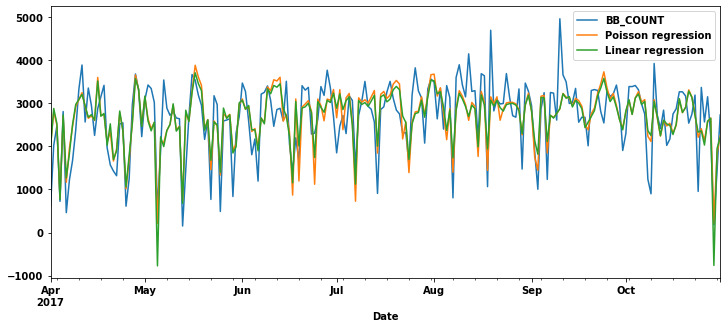

MAE Linear regression: 468.08311060849525
MAE Poisson regression: 453.9474168455362


In [30]:
data['BB_COUNT'].plot(figsize=(12,5), label='BB_COUNT')
poi_model_results.fittedvalues.plot(figsize=(12,5), label='Poisson regression')
lin_model_results.fittedvalues.plot(figsize=(12,5), label='Linear regression')
plt.legend()
plt.show()
print("MAE Linear regression:", mean_absolute_error(data['BB_COUNT'],lin_model_results.fittedvalues))
print("MAE Poisson regression:", mean_absolute_error(data['BB_COUNT'],poi_model_results.fittedvalues))

Если сравнивать с результатами прошлого занятия, то по прежнему Пуассоновская регрессия показывает лучший результат, чем Линейная. Но в общем результат хуже, чем полученный руками.

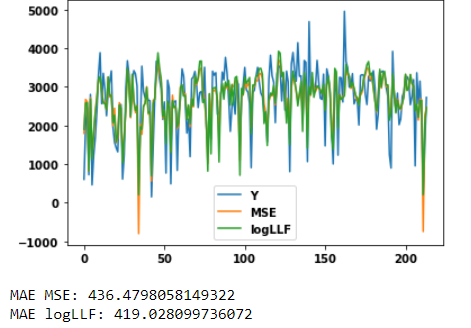

Для целевых переменных, имеющих гамма-распределение, применяется соответствующая функция связи `Gamma()`.

## 2. Scikit-learn

Недавно обобщенные линейные модели были добавлены также в пакет sklearn (начиная с версии 0.23).

In [10]:
import sklearn
sklearn.__version__

'0.24.1'

In [11]:
#pip install --upgrade scikit-learn

Модель пуассоновской регрессии находится в модуле `sklearn.linear_model`. Сравним её с моделью линейной регрессии из того же модуля.

In [12]:
from sklearn.linear_model import PoissonRegressor, LinearRegression

Пуассоновская регрессия, как и другие линейные модели, чувствительна к масштабу признаков. Нормализацию признаков можно выполнить с помощью функции `StandardScaler` из модуля `sklearn.preprocessing`.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X = crab.drop(['Satellite', 'const'], axis=1)
y = crab['Satellite']

In [15]:
X_scaled = scaler.fit_transform(X)

Обучение модели в sklearn производится путем применения метода `.fit` с указанием в качестве аргументов матрицы "объекты-признаки" `X` и вектора значений целевой переменной `y`.

In [16]:
poisson_model = PoissonRegressor()
poisson_model.fit(X_scaled, y)

linear_model = LinearRegression()
linear_model.fit(X_scaled, y)

poi_pred = poisson_model.predict(X_scaled)
lin_pred = linear_model.predict(X_scaled)

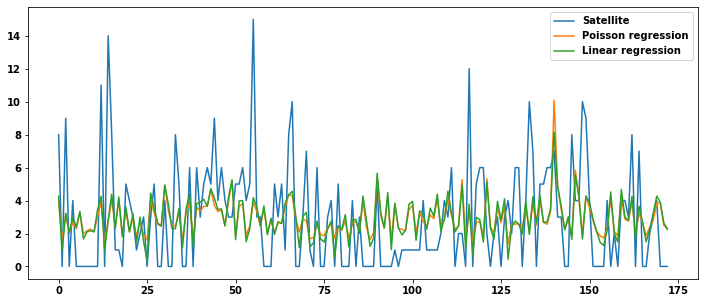

In [17]:
plt.subplots(figsize=(12,5))
plt.plot(y.values)
plt.plot(poi_pred)
plt.plot(lin_pred)
plt.legend(['Satellite', 'Poisson regression', 'Linear regression'])
plt.show()

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
<ul>Обучите пуассоновскую регрессию из sklearn на данных о количестве велосипедистов и оцените качество аппроксимации.</ul>
<p></p>
</div>

In [39]:
X = data.drop(['BB_COUNT', 'const'], axis=1)
y = data['BB_COUNT']
X_scaled = scaler.fit_transform(X)

In [40]:
poisson_model = PoissonRegressor()
poisson_model.fit(X_scaled, y)

linear_model = LinearRegression()
linear_model.fit(X_scaled, y)

poi_pred = poisson_model.predict(X_scaled)
lin_pred = linear_model.predict(X_scaled)

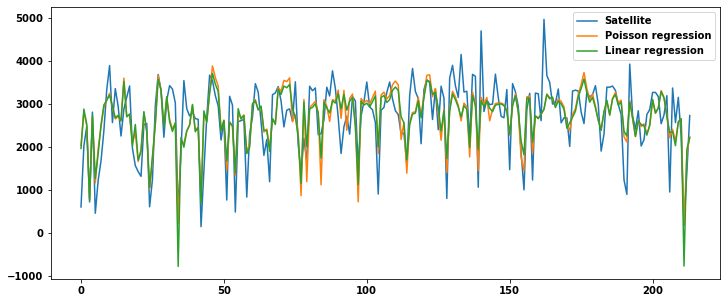

MAE Linear regression: 468.0831106084949
MAE Poisson regression: 453.9499426785536


In [41]:
plt.subplots(figsize=(12,5))
plt.plot(y.values)
plt.plot(poi_pred)
plt.plot(lin_pred)
plt.legend(['Satellite', 'Poisson regression', 'Linear regression'])
plt.show()
print("MAE Linear regression:", mean_absolute_error(data['BB_COUNT'],lin_pred))
print("MAE Poisson regression:", mean_absolute_error(data['BB_COUNT'],poi_pred))

Для гамма-регрессии можно воспользоваться функцией `GammaRegressor`.